In [7]:
import os
print(os.getcwd())

e:\crypto-sentiment-whales\notebooks


In [13]:
import os
print(os.listdir(".."))

['data', 'notebooks', 'presentation', 'README.md', 'reports', 'src']


In [14]:
import os
print("notebooks:", os.listdir("."))
print("data/raw:", os.listdir("../data/raw"))
print("data/cleaned:", os.listdir("../data/cleaned"))

notebooks: ['00_DateFix.ipynb', '01_EDA.ipynb', '02_WebScraping_Reddit.ipynb', '03_RAG_news_sentiment.ipynb', '04_Data_Sets_aggregation.ipynb', 'nltk_data', 'RAG_news.csv', 'RAG_new_2024-2025_with_sentiment_polarity.csv', 'reddit_crypto_posts_raw.csv', 'reddit_crypto_sentiment_2025.csv', 'reddit_sentiment_daily_by_coin.csv', 'reddit_sentiment_hourly.csv', 'reddit_sentiment_hourly_by_coin.csv']
data/raw: ['Twitter_sentiment_crypto_2025.csv']
data/cleaned: []


In [16]:
import pandas as pd
from IPython.display import display

# 1. News data
df_news = pd.read_csv("RAG_new_2024-2025_with_sentiment_polarity.csv")
print("NEWS DATA COLUMNS:\n", df_news.columns.tolist())
display(df_news.head())

# 2. Reddit data
df_reddit = pd.read_csv("reddit_crypto_sentiment_2025.csv")
print("\nREDDIT DATA COLUMNS:\n", df_reddit.columns.tolist())
display(df_reddit.head())

# 3. Twitter data (from data/raw)
df_twitter = pd.read_csv("../data/raw/Twitter_sentiment_crypto_2025.csv")
print("\nTWITTER DATA COLUMNS:\n", df_twitter.columns.tolist())
display(df_twitter.head())


NEWS DATA COLUMNS:
 ['id', 'title', 'description', 'newsDatetime', 'url', 'positiveVotes', 'negativeVotes', 'sourceUrl', 'currencies', 'vote_sentiment', 'sentiment', 'polarity']


,id,title,description,newsDatetime,url,positiveVotes,negativeVotes,sourceUrl,currencies,vote_sentiment,sentiment,polarity
0,148257,Cardano (ADA) Skyrockets in This Bullish Metri...,Majority of growth occurred in mid-December,2024-01-01 12:14:00,https://cryptopanic.com/news/19143576/Cardano-...,4,7,https://u.today/cardano-ada-skyrockets-in-this...,ADA,-3,0.7096,positive
1,152291,4 altcoins to buy under $1 for start of 2024,After altcoins took a breather in the final we...,2024-01-01 14:00:00,https://cryptopanic.com/news/19143677/4-altcoi...,1,1,https://finbold.com/4-altcoins-to-buy-under-1-...,BTC,0,0.0000,neutral
2,152291,4 altcoins to buy under $1 for start of 2024,After altcoins took a breather in the final we...,2024-01-01 14:00:00,https://cryptopanic.com/news/19143677/4-altcoi...,1,1,https://finbold.com/4-altcoins-to-buy-under-1-...,ADA,0,0.0000,neutral
3,152291,4 altcoins to buy under $1 for start of 2024,After altcoins took a breather in the final we...,2024-01-01 14:00:00,https://cryptopanic.com/news/19143677/4-altcoi...,1,1,https://finbold.com/4-altcoins-to-buy-under-1-...,XRP,0,0.0000,neutral
4,152291,4 altcoins to buy under $1 for start of 2024,After altcoins took a breather in the final we...,2024-01-01 14:00:00,https://cryptopanic.com/news/19143677/4-altcoi...,1,1,https://finbold.com/4-altcoins-to-buy-under-1-...,MATIC,0,0.0000,neutral



REDDIT DATA COLUMNS:
 ['timestamp', 'text', 'sentiment', 'polarity', 'coin']


,timestamp,text,sentiment,polarity,coin
0,2025-07-24 09:29:17,Ghana to officially license and regulate crypt...,0.0000,neutral,OTHER
1,2025-07-24 08:53:52,Western Union CEO Embraces Stablecoins as a Pa...,0.6249,positive,BTC
2,2025-07-24 08:13:19,🔥 MASSIVE $630M Liquidations Hit Crypto Bulls ...,-0.9599,negative,BTC
3,2025-07-24 07:22:00,Trump’s Crypto Working Group Set to Deliver Re...,0.0000,neutral,OTHER
4,2025-07-24 06:22:13,If someone had a large portfolio on Coinbase a...,-0.7882,negative,ETH



TWITTER DATA COLUMNS:
 ['timestamp', 'text', 'coin', 'sentiment', 'source', 'polarity']


,timestamp,text,coin,sentiment,source,polarity
0,2025-04-02 19:50:00,Biggest ETH transfer of the month today.,ETH,0.2104,Twitter,positive
1,2025-06-13 13:13:00,Biggest USDT burn of the year today.,USDT,0.2028,Twitter,positive
2,2025-01-08 04:28:00,USDT reserves reach all-time high.,USDT,0.1820,Twitter,positive
3,2025-01-22 11:12:00,People panic selling BTC or smart money moving...,BTC,0.9748,Twitter,positive
4,2025-05-06 10:27:00,USDT flows signal caution.,USDT,-0.0496,Twitter,neutral


In [20]:
import pandas as pd

# --- Load CryptoPanic News ---
df_news = pd.read_csv("RAG_new_2024-2025_with_sentiment_polarity.csv")
df_news['timestamp'] = pd.to_datetime(df_news['newsDatetime'])
df_news['coin'] = df_news['currencies']
df_news['source'] = "Cryptopanic"
df_news['text'] = df_news['title'].fillna('') + ' ' + df_news['description'].fillna('')
df_news = df_news[['timestamp', 'coin', 'sentiment', 'polarity', 'source', 'text']]

# --- Load Reddit ---
df_reddit = pd.read_csv("reddit_crypto_sentiment_2025.csv")
df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'])
df_reddit['source'] = "Reddit"
df_reddit = df_reddit[['timestamp', 'coin', 'sentiment', 'polarity', 'source', 'text']]

# --- Load Twitter ---
df_twitter = pd.read_csv("../data/raw/Twitter_sentiment_crypto_2025.csv")
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'])
df_twitter['source'] = "Twitter"
df_twitter = df_twitter[['timestamp', 'coin', 'sentiment', 'polarity', 'source', 'text']]

# --- Concatenate All ---
df_all = pd.concat([df_news, df_reddit, df_twitter], ignore_index=True)

# --- (Optional) Sort by timestamp ---
df_all = df_all.sort_values("timestamp").reset_index(drop=True)

# --- Save to CSV ---
df_all.to_csv("unified_crypto_sentiment_2024_2025.csv", index=False)
print("Combined file saved as 'unified_crypto_sentiment_2024_2025.csv'")

# Quick check
print(df_all.head())
print(df_all['source'].value_counts())


Combined file saved as 'unified_crypto_sentiment_2024_2025.csv'
            timestamp   coin  sentiment  polarity       source  \
0 2024-01-01 12:14:00    ADA     0.7096  positive  Cryptopanic   
1 2024-01-01 14:00:00    BTC     0.0000   neutral  Cryptopanic   
2 2024-01-01 14:00:00    ADA     0.0000   neutral  Cryptopanic   
3 2024-01-01 14:00:00    XRP     0.0000   neutral  Cryptopanic   
4 2024-01-01 14:00:00  MATIC     0.0000   neutral  Cryptopanic   

                                                text  
0  Cardano (ADA) Skyrockets in This Bullish Metri...  
1  4 altcoins to buy under $1 for start of 2024 A...  
2  4 altcoins to buy under $1 for start of 2024 A...  
3  4 altcoins to buy under $1 for start of 2024 A...  
4  4 altcoins to buy under $1 for start of 2024 A...  
source
Cryptopanic    7671
Twitter        1500
Reddit          797
Name: count, dtype: int64


In [23]:
#Coins count
import pandas as pd

# Load your combined file
df_all = pd.read_csv("unified_crypto_sentiment_2024_2025.csv")

# Count number of rows for each coin
coin_counts = df_all['coin'].value_counts().reset_index()
coin_counts.columns = ['coin', 'count']

print(coin_counts)

     coin  count
0     BTC   1972
1     ETH   1773
2     SOL   1348
3     ADA   1038
4     XRP    589
..    ...    ...
230  XSGD      1
231  DASH      1
232  VTHO      1
233   EOS      1
234  MOCA      1

[235 rows x 2 columns]


In [26]:
#Delete all the rows with coin S as they are irrelevant(news not about a specific coin)
import pandas as pd

# Load the unified data
df_all = pd.read_csv("unified_crypto_sentiment_2024_2025.csv")

# Remove rows where coin is 'S'
df_all_cleaned = df_all[df_all['coin'] != 'S']

# (Optional) Reset index
df_all_cleaned = df_all_cleaned.reset_index(drop=True)

# Save to a new CSV file
df_all_cleaned.to_csv("unified_crypto_sentiment_2024_2025_no_S.csv", index=False)

print("All rows with coin 'S' have been removed and saved as 'unified_crypto_sentiment_2024_2025_no_S.csv'.")
print("Number of rows after removal:", len(df_all_cleaned))

All rows with coin 'S' have been removed and saved as 'unified_crypto_sentiment_2024_2025_no_S.csv'.
Number of rows after removal: 9862


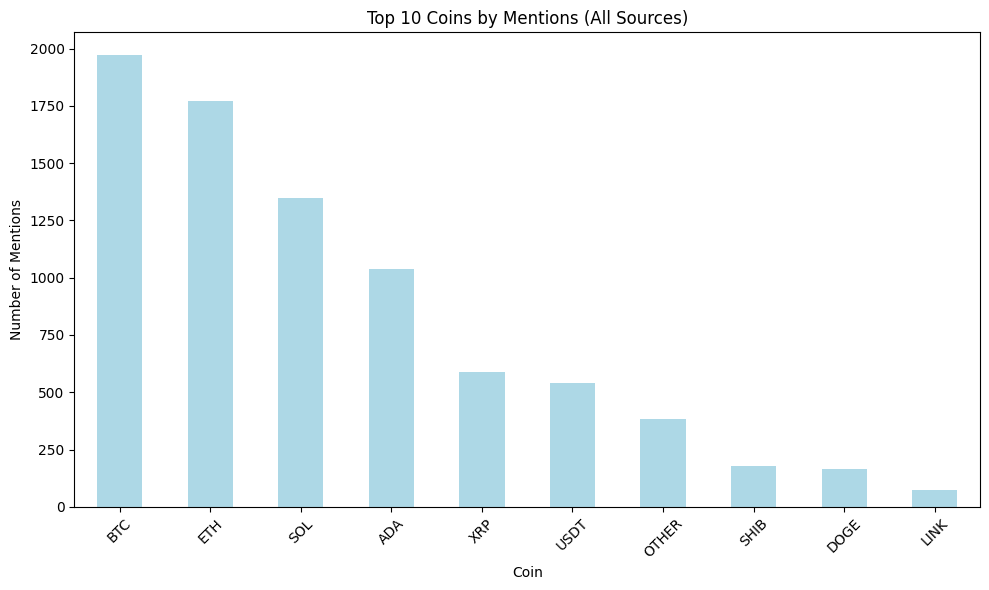

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned data
df = pd.read_csv("unified_crypto_sentiment_2024_2025.csv")

# Get the top 10 coins by count
top10 = df['coin'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color='lightblue')
plt.xlabel('Coin')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Coins by Mentions (All Sources)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
